# 딥러닝 이진분류

피마 인디언 데이터 분석하기
- 피마 인디언은 1950년대까지 비만이 없었음
- 이후 미국의 패스트푸드 문화를 받아들임
- 선천적 영양분 저장 능력과 결합되어 전체 60%가 당뇨, 80%가 비만
- 여기서는 피마 인디언의 당뇨병을 예측하는 모델을 만들어 본다

In [1]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)

In [5]:
df = pd.read_csv('pima-indians-diabetes.csv', header = 0)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df=df.sample(frac=1, random_state=42)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
596,0,67,76,0,0,45.3,0.194,46,0
440,0,189,104,25,0,34.3,0.435,41,1
327,10,179,70,0,0,35.1,0.200,37,0
725,4,112,78,40,0,39.4,0.236,38,0
585,1,93,56,11,0,22.5,0.417,22,0


- frac 만큼의 데이터를 렌덤으로 불러온다. frac = 1 이면 전체 데이터이다.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 596 to 123
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [10]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


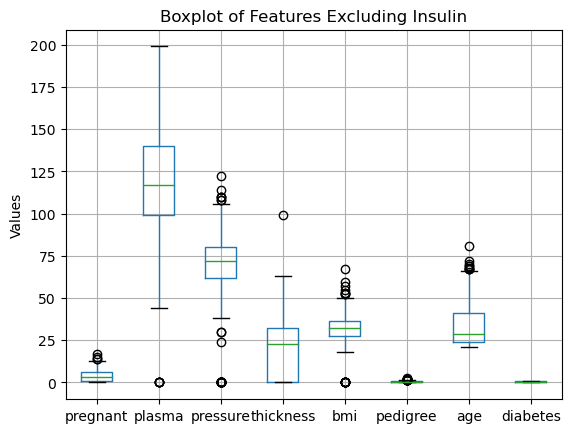

In [13]:
import matplotlib.pyplot as plt

# insulin 열 제외한 데이터프레임 생성
df_without_insulin = df.drop(columns=['insulin'])

# 박스 플롯 그리기
df_without_insulin.boxplot()
plt.title('Boxplot of Features Excluding Insulin')
plt.ylabel('Values')
plt.show()


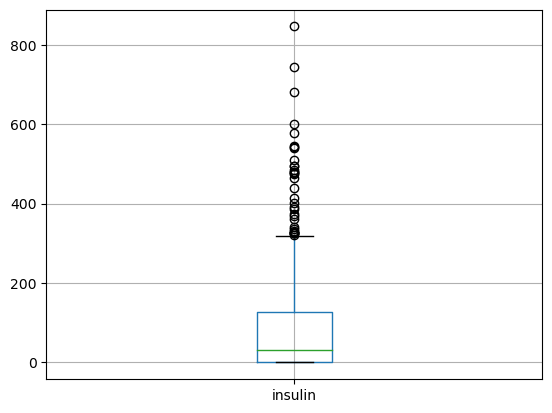

In [14]:
df.boxplot(column='insulin')
plt.show()

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(768, 8) (768,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)

(576, 8) (192, 8)


In [20]:
import tensorflow as tf


model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(8,)))
model.add(tf.keras.layers.Dense(units=24, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

- 이진분류이므로 출력층에 sigmoid 적용

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24)                216       
                                                                 
 dense_4 (Dense)             (None, 8)                 200       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
36/36 [==============================] - 1s 3ms/step - loss: 5.2022 - acc: 0.4167
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 1.3991 - acc: 0.5330
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 1.0287 - acc: 0.5434
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.9069 - acc: 0.5920
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 0.8539 - acc: 0.5990
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.7831 - acc: 0.6337
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.7478 - acc: 0.6285
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 0.7295 - acc: 0.6406
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 0.7147 - acc: 0.6597
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 0.7193 - acc: 0.6493
Epoch 11/200
36/36 [==============================] - 0s 2m

6/6 [==============================] - 0s 2ms/step - loss: 0.5314 - acc: 0.7135
Test Data Acc. : [0.5314295291900635, 0.7135416865348816]


## 모델 저장 및 재사용

In [25]:
import os
temp_model_path = os.path.join(path,'models')

if os.path.exists(temp_model_path):
    print(f'{temp_model_path} -- Folder is already exist. \n')
else:
    os.makedirs(temp_model_path)
    print(f'{temp_model_path} -- Folder is successfully created. \n')
    
## exist_ok 인자를 통해 조건문을 생략할 수 있다.
# os.makedirs(temp_model_path, exist_ok=True)
# print(f'{temp_model_path} -- Folder is created or already exists. \n')

D:\elice_python\GAS_5\pytest\models -- Folder is already exist. 



In [26]:
import os
os.chdir(temp_model_path)

In [27]:
model.save('pima-indians-diabetes.h5')

In [29]:
from tensorflow.keras.models import load_model
loaded_model = load_model('pima-indians-diabetes.h5')
loaded_model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5314 - acc: 0.7135


[0.5314295291900635, 0.7135416865348816]

In [30]:
new_data = {"pregnant":[6], "plasma":[105], "pressure":[80], "thickness":[28],
"insulin":[0], "BMI":[32.5], "pedigree":[0.878], "age":[26]}
new_data = pd.DataFrame(new_data)
print(new_data)
loaded_model.predict(new_data)

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age
0         6     105        80         28        0  32.5     0.878   26
1/1 [==============================] - 0s 82ms/step


array([[0.2087934]], dtype=float32)

- 새로운 데이터를 예측하기 위해서는 데이터를 먼저 딕셔너리로 만든 후 데이터 프레임으로 변환해 2차원 형태로 모델에 전달한다.